<a href="https://colab.research.google.com/github/su-zu-me/EGFR_RF_Model/blob/main/EGFR_RF_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shap

     |████████████████████████████████| 358kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=63ffaf0cca54e0be5ef6737dd05da6f6f07f075f4c0222992e48d2d3d96e5bb0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from IPython.display import display, HTML

In [4]:
url = 'https://raw.githubusercontent.com/su-zu-me/EGFR_RF_Model/main/EGFR_profiling.csv'
ori_data = pd.read_csv(url)
data = pd.read_csv(url)

data.head()

,compound,label,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18,#19,#20,#21,#22,#23,#24,#25,#26,#27,#28,#29,#30,#31,#32,#33,#34,#35,#36,#37,#38,...,#1012,#1013,#1014,#1015,#1016,#1017,#1018,#1019,#1020,#1021,#1022,#1023,#1024,#1025,#1026,#1027,#1028,#1029,#1030,#1031,#1032,#1033,#1034,#1035,#1036,#1037,#1038,#1039,#1040,#1041,#1042,#1043,#1044,#1045,#1046,#1047,#1048,#1049,#1050,#1051
0,BCFGMOOMADDAQU-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BFTPDUXUTFGDLP-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CNRXAYAWNNSNLT-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CPVBDWFSIXDJER-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CQXFMKMVOOUGSS-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.drop(['compound', 'label'], axis=1)
y = data['label']
compound_info = data['compound']

fea_name_list = list(X.columns)

X_train, X_test, y_train, y_test, compound_info_train, compound_info_test = train_test_split(X, y, compound_info, test_size=0.2)

In [6]:
X

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18,#19,#20,#21,#22,#23,#24,#25,#26,#27,#28,#29,#30,#31,#32,#33,#34,#35,#36,#37,#38,#39,#40,...,#1012,#1013,#1014,#1015,#1016,#1017,#1018,#1019,#1020,#1021,#1022,#1023,#1024,#1025,#1026,#1027,#1028,#1029,#1030,#1031,#1032,#1033,#1034,#1035,#1036,#1037,#1038,#1039,#1040,#1041,#1042,#1043,#1044,#1045,#1046,#1047,#1048,#1049,#1050,#1051
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
527    1
528    1
529    1
530    1
531    1
Name: label, Length: 532, dtype: int64

In [8]:
print(compound_info)

0      BCFGMOOMADDAQU-UHFFFAOYSA-N
1      BFTPDUXUTFGDLP-UHFFFAOYSA-N
2      CNRXAYAWNNSNLT-UHFFFAOYSA-N
3      CPVBDWFSIXDJER-UHFFFAOYSA-N
4      CQXFMKMVOOUGSS-UHFFFAOYSA-N
                  ...             
527    ZVDDPXIWKBBCQE-UHFFFAOYSA-N
528    ZVGVJHARPQUYQS-UHFFFAOYSA-N
529    ZWZKHJQCLZIUIT-UHFFFAOYSA-N
530    ZXLFIHLBHMLHFJ-UHFFFAOYSA-N
531    ZYTFPHRVOZXPGZ-UHFFFAOYSA-N
Name: compound, Length: 532, dtype: object


In [9]:
print(fea_name_list)

['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', '#11', '#12', '#13', '#14', '#15', '#16', '#17', '#18', '#19', '#20', '#21', '#22', '#23', '#24', '#25', '#26', '#27', '#28', '#29', '#30', '#31', '#32', '#33', '#34', '#35', '#36', '#37', '#38', '#39', '#40', '#41', '#42', '#43', '#44', '#45', '#46', '#47', '#48', '#49', '#50', '#51', '#52', '#53', '#54', '#55', '#56', '#57', '#58', '#59', '#60', '#61', '#62', '#63', '#64', '#65', '#66', '#67', '#68', '#69', '#70', '#71', '#72', '#73', '#74', '#75', '#76', '#77', '#78', '#79', '#80', '#81', '#82', '#83', '#84', '#85', '#86', '#87', '#88', '#89', '#90', '#91', '#92', '#93', '#94', '#95', '#96', '#97', '#98', '#99', '#100', '#101', '#102', '#103', '#104', '#105', '#106', '#107', '#108', '#109', '#110', '#111', '#112', '#113', '#114', '#115', '#116', '#117', '#118', '#119', '#120', '#121', '#122', '#123', '#124', '#125', '#126', '#127', '#128', '#129', '#130', '#131', '#132', '#133', '#134', '#135', '#136', '#137', '#138', '#1

In [10]:
rf_model = RandomForestClassifier(n_estimators=500, bootstrap=True, max_features='sqrt', random_state=12)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [11]:
y_pred = rf_model.predict(X_test)

print('Recall inhibitors: ', round(metrics.recall_score(y_test, y_pred), 3))
print('Recall Not inhibitors: ', round(metrics.recall_score(y_test, y_pred, pos_label=0), 3))
print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred), 3))
print('MCC: ', round(metrics.matthews_corrcoef(y_test, y_pred), 3))

Recall inhibitors:  1.0
Recall Not inhibitors:  0.375
Accuracy:  0.953
MCC:  0.597


In [20]:
count = 0

print('{:>5s} {:>28s} {:>10s} {:>7s}'.format('ID', 'Inchikey', 'Predict', 'True'))
print('-'*55)
for id, label in y_test.items():
  if(label != y_pred[count]):
    print('{:>5d} {:>28s} {:>10d} {:>7d}'.format(id, data.iloc[id]['compound'], y_pred[count], label))
  count += 1

   ID                     Inchikey    Predict    True
-------------------------------------------------------
   37  ZVWRFVCNQOECJS-UHFFFAOYSA-N          1       0
   19  MVJMMLFMPWITEJ-UHFFFAOYSA-N          1       0
    6  DYYZXRCFCVDSKD-UHFFFAOYSA-N          1       0
    4  CQXFMKMVOOUGSS-UHFFFAOYSA-N          1       0
   31  WZZXMNBOPNKKSX-UHFFFAOYSA-N          1       0


No handles with labels found to put in legend.


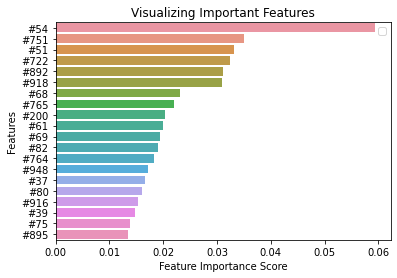

In [21]:
feature_imp = pd.Series(rf_model.feature_importances_, index=fea_name_list).sort_values(ascending=False)

sns_plot = sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
fig = sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

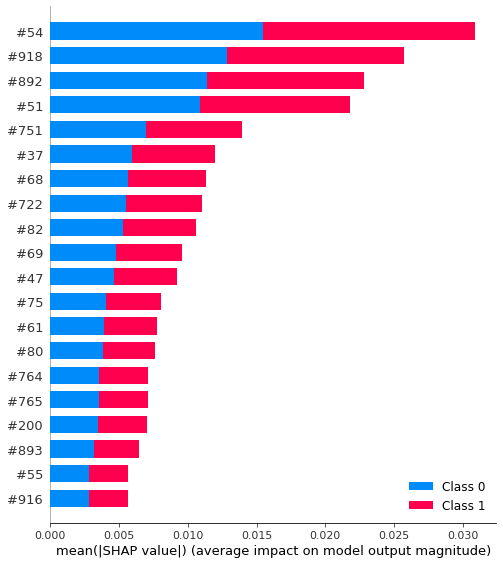

In [22]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_test, plot_type="bar")